# Course: Building Clustering Models with scikit-learn

## Module 2: Building a Simple Clustering Model in scikit-learn

### Exploring the Iris Dataset
Extend K-means clustering to data that have more than two features/coordinates.

In [1]:
from sklearn import metrics
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Manually import the iris dataset but it could also be imported directly through scikit

# Skip provided headers (first row) and create custom headers (names)
iris_df = pd.read_csv('datasets/iris.csv', 
                      skiprows=1, 
                      names = ['sepal-length',
                               'sepal-width',
                               'petal-length',
                               'petal-width',
                               'class'])

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Shuffle to see the different classes
iris_df = iris_df.sample(frac=1).reset_index(drop=True)
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,7.9,3.8,6.4,2.0,Iris-virginica
1,6.3,3.3,6.0,2.5,Iris-virginica
2,6.0,2.9,4.5,1.5,Iris-versicolor
3,5.5,2.4,3.7,1.0,Iris-versicolor
4,4.4,3.2,1.3,0.2,Iris-setosa


In [4]:
# Encode the class (target/label) values using LabelEncoder

from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

iris_df['class'] = label_encoding.fit_transform(iris_df['class'].astype(str))

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,7.9,3.8,6.4,2.0,2
1,6.3,3.3,6.0,2.5,2
2,6.0,2.9,4.5,1.5,1
3,5.5,2.4,3.7,1.0,1
4,4.4,3.2,1.3,0.2,0


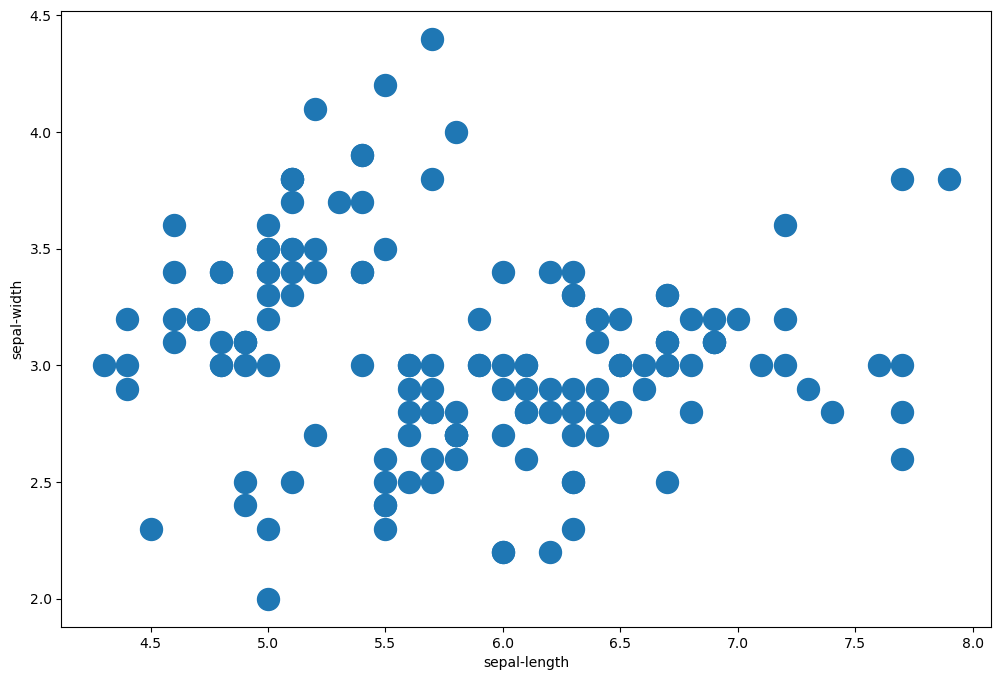

In [5]:
# Visualize sepal-length x sepal-width

fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(iris_df['sepal-length'], iris_df['sepal-width'], s=250)

plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

plt.show()

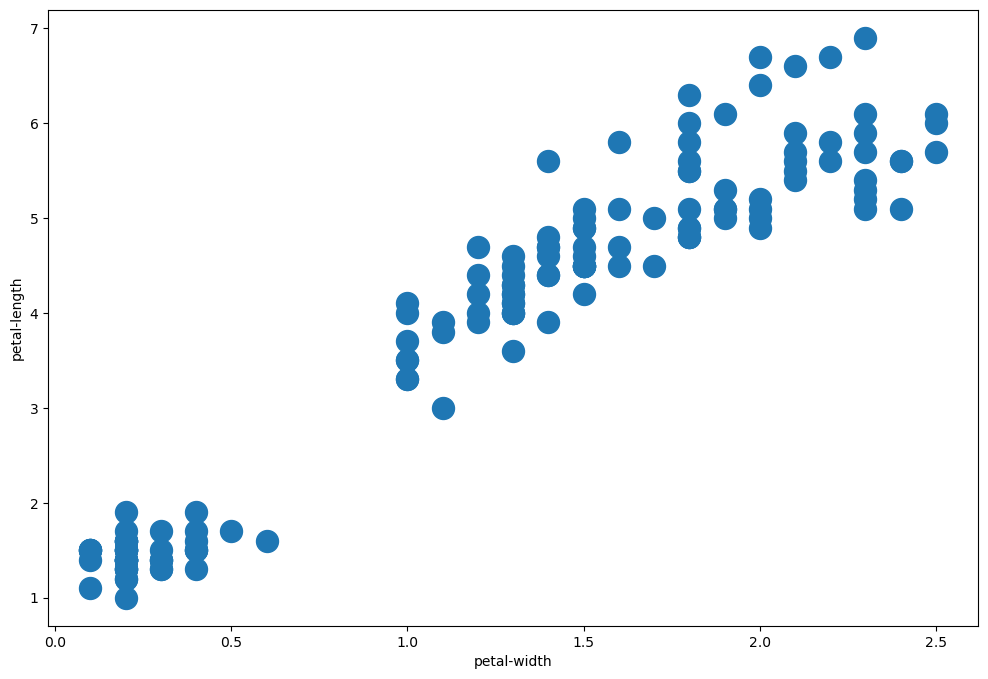

In [6]:
# Visualize petal-length x petal-width

fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(iris_df['petal-width'], iris_df['petal-length'], s=250)

plt.xlabel('petal-width')
plt.ylabel('petal-length')

plt.show()

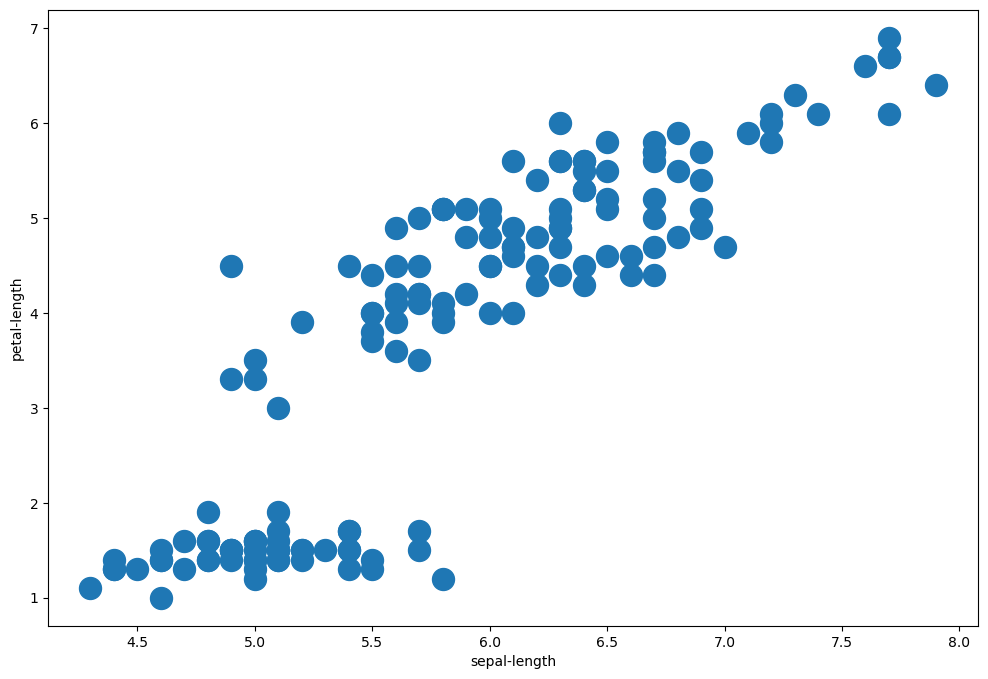

In [7]:
# Visualize sepal-length x petal-length

fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(iris_df['sepal-length'], iris_df['petal-length'], s=250)

plt.xlabel('sepal-length')
plt.ylabel('petal-length')

plt.show()

In [14]:
# Create a subset DF using just the two features that seem to provide effective clusters

iris_2D = iris_df[['sepal-length', 'petal-length']]

print('iris_2D Shape: ', iris_2D.shape)
iris_2D.sample(5)

iris_2D Shape:  (150, 2)


,sepal-length,petal-length
17,4.6,1.4
79,6.1,4.7
53,7.2,5.8
9,6.7,5.2
135,6.4,5.6


In [17]:
iris_2D = np.array(iris_2D)
iris_2D.shape

(150, 2)

In [19]:
kmeans_model_2D = KMeans(n_clusters=3, max_iter=1000).fit(iris_2D)

array([[6.83902439, 5.67804878],
       [5.00784314, 1.49411765],
       [5.87413793, 4.39310345]])

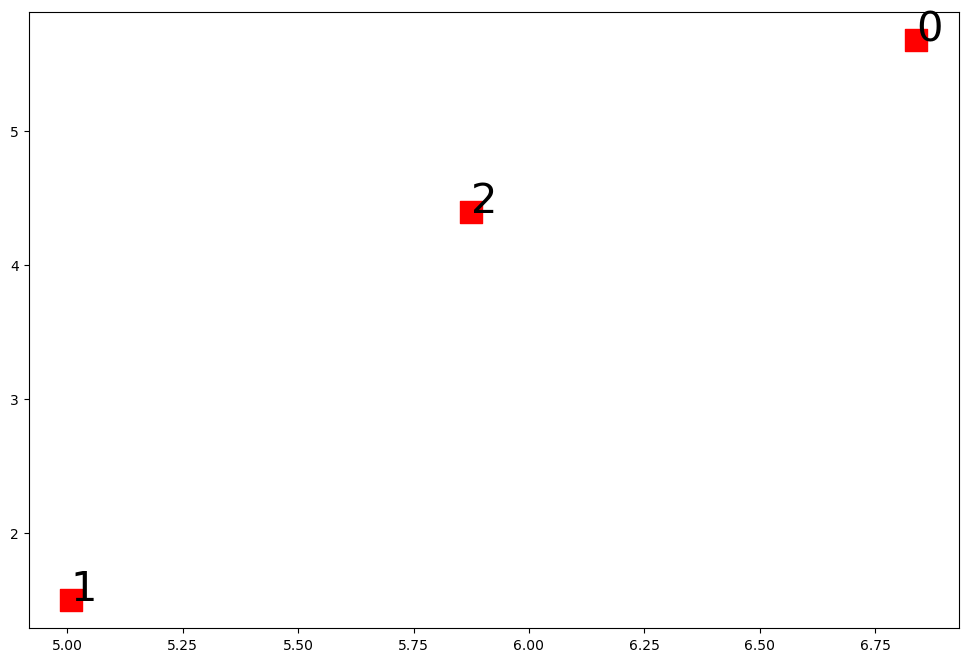

In [20]:
# Visualize the centroids (this can still be done with a scatter plot because it's 2D)

centroids_2D = kmeans_model_2D.cluster_centers_
centroids_2D

fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s=250, marker='s')

for i in range(len(centroids_2D)):
    plt.annotate(i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize=30)

In [21]:
iris_labels = iris_df['class']

In [22]:
print("Homogeneity_score: ", metrics.homogeneity_score(iris_labels, kmeans_model_2D.labels_))

print("Completeness_score: ", metrics.completeness_score(iris_labels, kmeans_model_2D.labels_))

print("v_measure_score: ", metrics.v_measure_score(iris_labels, kmeans_model_2D.labels_))

print("Adjusted_rand_score: ", metrics.adjusted_rand_score(iris_labels, kmeans_model_2D.labels_))

print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(iris_labels,  kmeans_model_2D.labels_))

print("Silhouette_score: ", metrics.silhouette_score(iris_2D, kmeans_model_2D.labels_))

Homogeneity_score:  0.7033177646052958
Completeness_score:  0.7096993707802843
v_measure_score:  0.706494157075837
Adjusted_rand_score:  0.6988627672348092
Adjusted_mutual_info_score:  0.7028024531409132
Silhouette_score:  0.5890612473759282


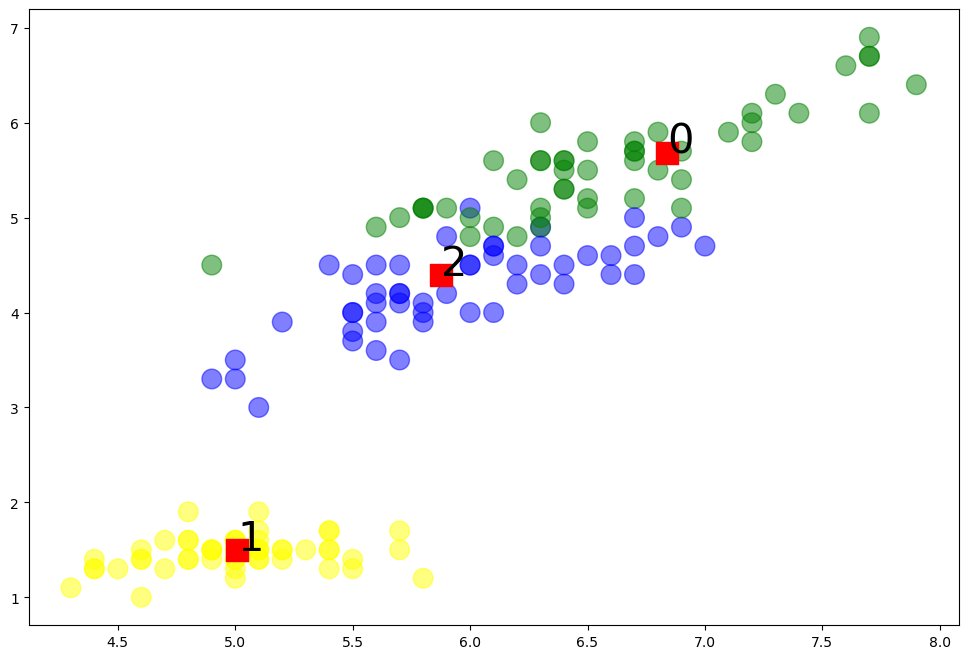

In [23]:
# Visualize the dataset along with the centroids found by the estimator

colors = ['yellow','blue','green']

plt.figure(figsize=(12, 8))

plt.scatter(iris_df['sepal-length'], iris_df['petal-length'], c=iris_df['class'], s=200,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s=250, marker='s')

for i in range(len(centroids_2D)):
    plt.annotate( i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize=30)

In [24]:
# Now cluster using all four features rather than just the two

iris_features = iris_df.drop('class', axis=1)

iris_features.head()

,sepal-length,sepal-width,petal-length,petal-width
0,7.9,3.8,6.4,2.0
1,6.3,3.3,6.0,2.5
2,6.0,2.9,4.5,1.5
3,5.5,2.4,3.7,1.0
4,4.4,3.2,1.3,0.2


In [25]:
iris_labels = iris_df['class']

iris_labels.sample(5)

6      1
53     2
110    0
117    0
78     1
Name: class, dtype: int64

In [26]:
kmeans_model = KMeans(n_clusters=3).fit(iris_features)

In [27]:
kmeans_model.labels_

array([2, 2, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2,
       1, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0,
       1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 1, 2, 1, 2,
       1, 1, 2, 0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2,
       2, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2,
       0, 2, 1, 0, 2, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 2, 0,
       0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2], dtype=int32)

In [28]:
kmeans_model.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [30]:
# Note the scores (other than silhouette) with all features performed better than with just the two

print("Homogeneity_score: ", metrics.homogeneity_score(iris_labels, kmeans_model.labels_))
print("Completeness_score: ", metrics.completeness_score(iris_labels, kmeans_model.labels_))
print("v_measure_score: ", metrics.v_measure_score(iris_labels, kmeans_model.labels_))
print("Adjusted_rand_score: ", metrics.adjusted_rand_score(iris_labels, kmeans_model.labels_))
print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(iris_labels,  kmeans_model.labels_))
print("Silhouette_score: ", metrics.silhouette_score(iris_features, kmeans_model.labels_))

Homogeneity_score:  0.7514854021988338
Completeness_score:  0.7649861514489815
v_measure_score:  0.7581756800057784
Adjusted_rand_score:  0.7302382722834697
Adjusted_mutual_info_score:  0.7551191675800484
Silhouette_score:  0.5525919445499757
